# OSS Contributions
# Code contributions Vs Non-code contributions

Research Question1: How do we compare non-code contributors with code contributors?
\
Research Question2: What is the frequency of code and non-code contributions in OSS projects over the past 5 years?\
Research Question3: How does gender have an effect on the type of contribution being made in OSS projects?

In [1]:
userName = 'jayapats'
token = '04dd4847335a564206868c472cc63660f461dc44'

In [2]:
# install any missing dependencies (only needed if you haven't installed these already during tutorials)
!pip install "git+https://github.com/EPICLab/miner-utils"
!pip install gitpython
!pip install "pandas"
!pip install "numpy"
!pip install "matplotlib"
!pip install "stop-words"
import pandas

  Cloning https://github.com/EPICLab/miner-utils to c:\users\sweth\appdata\local\temp\pip-req-build-jmol1ptj
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for MinerUtils: filename=MinerUtils-2.6.0-py3-none-any.whl size=7872 sha256=cb972d3ab956e7e0c1391ae9db36c7b7b7b1f2b6c616fac9003804405866124c
  Stored in directory: C:\Users\sweth\AppData\Local\Temp\pip-ephem-wheel-cache-xrmh5e9h\wheels\fe\91\28\5eba084a42706e9e4d24f442a0c04ff0eca7d51d53d1cc46d4
Successfully built MinerUtils


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# setup environment (import any needed dependencies)
from minerutils import GitHub
gh = GitHub(userName, token)

In [49]:
pandas.__version__

'1.0.5'

## Part 1: `bitcoin/bitcoin` project

For this assignment, we will investigate the [bitcoin/bitcoin](https://github.com/bitcoin/bitcoin) project.

# RQ-1: How do we compare non-code contributors with code contributors?
1.Getting count of issue raised per contributor

In [4]:
all_issues = gh.get("/repos/d3/d3/issues", params={"since": "2015-01-01T:00:00:00Z", "state":"all"})
gh.writeData("airbnbIssues.json", all_issues)
all_issues = pandas.DataFrame(all_issues)
print(len(all_issues))

1285


In [5]:
#for timestamp
IssuesPR_time = pandas.DataFrame()
IssuesPR_time["Timestamp"] = all_issues["created_at"]
IssuesPR_time
#Saving the timestamps to a csv file
IssuesPR_time.to_csv(r'/Timestamp_files/d3/IssueTimestamp_d3.csv', index = False, header=True)

,Timestamp
0,2020-11-13T15:14:43Z
1,2020-11-04T06:44:38Z
2,2020-10-27T14:07:57Z
3,2020-09-29T04:07:58Z
4,2020-09-25T07:52:58Z
...,...
1280,2011-03-17T10:00:05Z
1281,2011-03-14T09:13:10Z
1282,2011-02-24T22:57:07Z
1283,2010-11-05T02:50:11Z


In [6]:
#Saving the timestamps to a csv file
IssuesPR_time.to_csv(r'/Timestamp_files/d3/IssueTimestamp_d3.csv', index = False, header=True)

In [8]:
IssuesPR = pandas.DataFrame(all_issues) #Has all the issues & PR's
# Dropping PR's from the issues to get the issue count alone
issues = pandas.DataFrame()
for index,row in all_issues.iterrows():
    if pandas.notnull(row["pull_request"]):
        issues=all_issues.drop(index, inplace=True)
print(len(all_issues))#Data after droping PR's,this now has only issues
print(len(IssuesPR))#Has all the issues & PR's

1013
1285


In [19]:
all_issues.iloc[120]

url                         https://api.github.com/repos/airbnb/javascript...
repository_url                 https://api.github.com/repos/airbnb/javascript
labels_url                  https://api.github.com/repos/airbnb/javascript...
comments_url                https://api.github.com/repos/airbnb/javascript...
events_url                  https://api.github.com/repos/airbnb/javascript...
html_url                     https://github.com/airbnb/javascript/issues/2092
id                                                                  495932807
node_id                                              MDU6SXNzdWU0OTU5MzI4MDc=
number                                                                   2092
title                                                    Undescore param name
user                        {'login': 'alexalannunes', 'id': 16847836, 'no...
labels                                                                     []
state                                                           

In [10]:
#Getting the issue founder name
all_issues['login_name'] = all_issues.user.apply(lambda x: x.get('login'))
#Getting the frequency count per user for issues
issuePerUser = pandas.DataFrame()
#issuePerUser = all_issues['login_name'].value_counts()
issuePerUser = all_issues['login_name'].value_counts().rename_axis('names').to_frame('IssueCount')
#Unique number of users
print(len(issuePerUser))
#frequency count per user for issues only
issuePerUser################################################### Has final list of names and their count

796


,IssueCount
names,
mbostock,96
ghost,12
shawnbot,6
jasondavies,6
antonioaltamura,5
...,...
TrySound,1
jiywang3,1
ResidentMario,1


2. Getting the count of comments per contributor (Issues & Pull request)

In [7]:
issue_comments = gh.get("/repos/d3/d3/comments", params={"since": "2015-01-01T:00:00:00Z"})
gh.writeData("airbnbIssuecomment.json", issue_comments)
issue_comments_all = pandas.DataFrame(issue_comments)
print(len(issue_comments_all))

177


In [11]:
#Timestamp for comments#########################
#for timestamp
IssuesPR_cmnt_time = pandas.DataFrame()
IssuesPR_cmnt_time["Timestamp"] = issue_comments_all["created_at"]
IssuesPR_cmnt_time
#Saving the timestamps to a csv file
IssuesPR_cmnt_time.to_csv(r'/Timestamp_files/d3/IssueCmntTimestamp_d3.csv', index = False, header=True)

In [9]:
issue_comments_all.iloc[10]

url                   https://api.github.com/repos/d3/d3/comments/34...
html_url              https://github.com/d3/d3/commit/c29d4dc1a7b476...
id                                                               342010
node_id                                MDEzOkNvbW1pdENvbW1lbnQzNDIwMTA=
user                  {'login': 'jasondavies', 'id': 31223, 'node_id...
position                                                             35
line                                                                 37
path                                                        d3.chart.js
commit_id                      c29d4dc1a7b47614fc3b65ef091cc2d1ac395b2e
created_at                                         2011-04-14T07:24:50Z
updated_at                                         2011-04-14T07:24:50Z
author_association                                          CONTRIBUTOR
body                  Cool, I see now why you didn't suggest a terna...
Name: 10, dtype: object

In [23]:
#Getting the frequency count per user for comments
#Getting the commenter name
issue_comments_all['login_name'] = issue_comments_all.user.apply(lambda x: x.get('login'))

#Getting the frequency count of comments per user for both issue & PR
issuePerUser_comments = pandas.DataFrame()
#issuePerUser = all_issues['login_name'].value_counts()
issuePerUser_comments = issue_comments_all['login_name'].value_counts().rename_axis('names').to_frame('IssueCount')
#Unique number of users
print(len(issuePerUser_comments))
issuePerUser_comments################################################### Has final list of names and their count of the commenter

1425


,IssueCount
names,
lencioni,44
hshoff,24
architectcodes,21
ljharb,21
1pete,18
...,...
niuchunling,1
shelbyspeegle,1
zhujinxuan,1


RQ2 - What is the frequency of code and non-code contributions in OSS projects over the past 5 years

13481


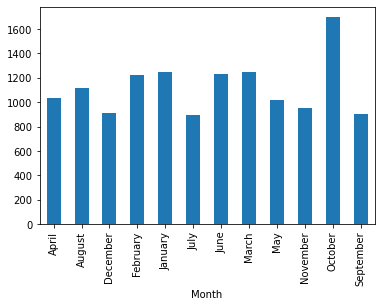

In [5]:
####Frequency of Code contributions
code_freq = pandas.read_csv('all_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

In [ ]:
####Frequency of Non-code contributions
code_freq = pandas.read_csv('Issue_PR.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%Y")
grouped_Year = code_freq.groupby("Year").size()
grouped_Year.plot(x="Year", y="index", kind="bar")

29448


In [ ]:
#For each projet 
####Frequency of Code contributions
code_freq = pandas.read_csv('all_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

812


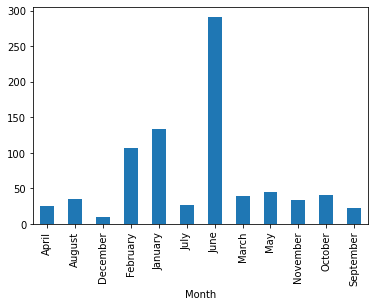

In [29]:
####Plotting Code for D3##########################
code_freq = pandas.read_csv('d3_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

In [35]:
###Descriptive stats
code_freq = pandas.read_csv('d3_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
print("Mean: ", grouped_Month.mean())
print("Median: ",grouped_Month.median())
print("Standard Deviation: ", grouped_Month.std())
print("Variance of code contributions: ", grouped_Month.var())

812
Mean:  67.66666666666667
Median:  37.0
Standard Deviation:  79.07572128643339
Variance of code contributions:  6252.969696969696


1515


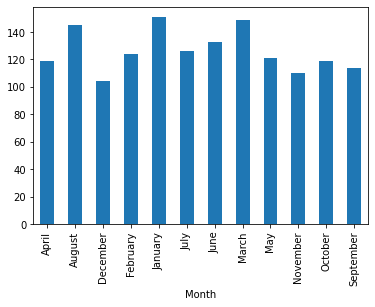

In [31]:
####Plotting Non-Code for D3##########################
noncode_freq = pandas.read_csv('d3d3_nonc_Timestamp.csv')
print(len(noncode_freq))
for index,row in noncode_freq.iterrows():
    noncode_freq["Timestamp"] = pandas.to_datetime(noncode_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    noncode_freq["Month"] = noncode_freq["Timestamp"].dt.strftime("%B")
grouped_Month = noncode_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

In [36]:
###Descriptive stats non-code D3
noncode_freq = pandas.read_csv('d3d3_nonc_Timestamp.csv')
print(len(noncode_freq))
for index,row in noncode_freq.iterrows():
    noncode_freq["Timestamp"] = pandas.to_datetime(noncode_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    noncode_freq["Month"] = noncode_freq["Timestamp"].dt.strftime("%B")
grouped_Month = noncode_freq.groupby("Month").size()
print("Mean: ", grouped_Month.mean())
print("Median: ",grouped_Month.median())
print("Standard Deviation: ", grouped_Month.std())
print("Variance of code contributions: ", grouped_Month.var())

1515
Mean:  126.25
Median:  122.5
Standard Deviation:  15.297801386889793
Variance of code contributions:  234.02272727272728


1377


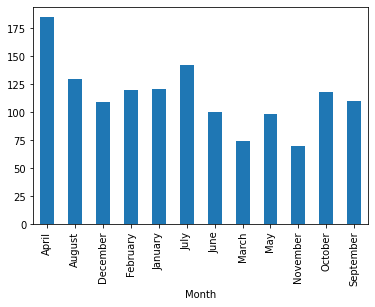

In [22]:
####Plotting Code for Airbnb##########################
code_freq = pandas.read_csv('airbnb_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

In [37]:
####Stats Code for Airbnb##########################
code_freq = pandas.read_csv('airbnb_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
###Descriptive stats
print("Mean: ", grouped_Month.mean())
print("Median: ",grouped_Month.median())
print("Standard Deviation: ", grouped_Month.std())
print("Variance of code contributions: ", grouped_Month.var())

1377
Mean:  114.75
Median:  114.0
Standard Deviation:  30.45749646489499
Variance of code contributions:  927.6590909090909


10264


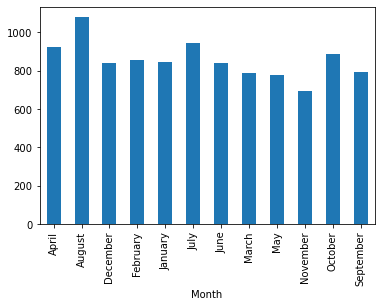

In [23]:
####Plotting Non-Code for Airbnb##########################
noncode_freq = pandas.read_csv('airbnb_noncode_time.csv')
print(len(noncode_freq))
for index,row in noncode_freq.iterrows():
    noncode_freq["Timestamp"] = pandas.to_datetime(noncode_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    noncode_freq["Month"] = noncode_freq["Timestamp"].dt.strftime("%B")
grouped_Month = noncode_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

In [39]:
####Stats Non-Code for Airbnb##########################
noncode_freq = pandas.read_csv('airbnb_noncode_time.csv')
print(len(noncode_freq))
for index,row in noncode_freq.iterrows():
    noncode_freq["Timestamp"] = pandas.to_datetime(noncode_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    noncode_freq["Month"] = noncode_freq["Timestamp"].dt.strftime("%B")
grouped_Month = noncode_freq.groupby("Month").size()
###Descriptive stats
print("Mean: ", grouped_Month.mean())
print("Median: ",grouped_Month.median())
print("Standard Deviation: ", grouped_Month.std())
print("Variance of code contributions: ", grouped_Month.var())

10264
Mean:  855.3333333333334
Median:  844.5
Standard Deviation:  97.38240771994363
Variance of code contributions:  9483.333333333336


894


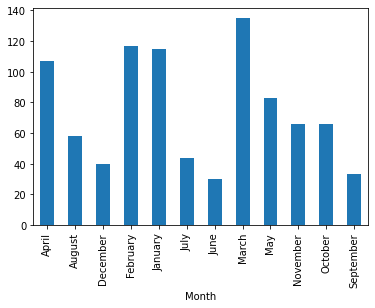

In [24]:
####Plotting Code for Getify##########################
code_freq = pandas.read_csv('getify_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

In [38]:
#Stats for code contribution
code_freq = pandas.read_csv('getify_code.csv')
print(len(code_freq))
for index,row in code_freq.iterrows():
    code_freq["Timestamp"] = pandas.to_datetime(code_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    code_freq["Month"] = code_freq["Timestamp"].dt.strftime("%B")
grouped_Month = code_freq.groupby("Month").size()
print("Mean: ", grouped_Month.mean())
print("Median: ",grouped_Month.median())
print("Standard Deviation: ", grouped_Month.std())
print("Variance of code contributions: ", grouped_Month.var())

894
Mean:  74.5
Median:  66.0
Standard Deviation:  36.275461277688684
Variance of code contributions:  1315.909090909091


4448


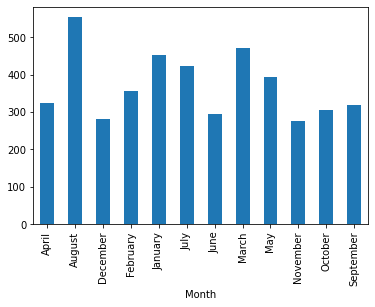

In [25]:
####Plotting Non-Code for Getify##########################
noncode_freq = pandas.read_csv('getify_non_code_time.csv')
print(len(noncode_freq))
for index,row in noncode_freq.iterrows():
    noncode_freq["Timestamp"] = pandas.to_datetime(noncode_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    noncode_freq["Month"] = noncode_freq["Timestamp"].dt.strftime("%B")
grouped_Month = noncode_freq.groupby("Month").size()
grouped_Month.plot(x="Month", y="index", kind="bar")

In [40]:
#Stats for Non-code
noncode_freq = pandas.read_csv('getify_non_code_time.csv')
print(len(noncode_freq))
for index,row in noncode_freq.iterrows():
    noncode_freq["Timestamp"] = pandas.to_datetime(noncode_freq["Timestamp"], format="%Y-%m-%dT%H:%M:%S")
    noncode_freq["Month"] = noncode_freq["Timestamp"].dt.strftime("%B")
grouped_Month = noncode_freq.groupby("Month").size()
print("Mean: ", grouped_Month.mean())
print("Median: ",grouped_Month.median())
print("Standard Deviation: ", grouped_Month.std())
print("Variance of code contributions: ", grouped_Month.var())

4448
Mean:  370.6666666666667
Median:  339.5
Standard Deviation:  88.22423222400494
Variance of code contributions:  7783.515151515152


# https://github.com/public-apis/public-apis

#Get all commits for the project for the last 5 years last 5 years
commits = gh.get("repos/public-apis/public-apis/commits/", params={"since": "2015-01-01T:00:00:00Z", "until": "2020-01-01T:00:00:00Z"})

#Getting the logins or username of the authors who did the commits (not unique)
login = []
committed_at = []

for commit in commits:
    if (commit['author'] is not None):
        login.append(commit['author']['login'])
        print(len(login))
        committed_at.append(commit['commit']['author']['date'])
        print(len(committed_at))

d_timestamp = {'Login': login, 'Timestamp': committed_at}
committed_at_api = pandas.DataFrame(d_timestamp, columns=['Login','Timestamp'])

# Saving the timestamps to a csv file
committed_at_api.to_csv(r'timestamp_api.csv', index = False, header=True)

#Getting unique logins and frequency of each
df_login = pandas.DataFrame(login)
df_login.columns = ['login']
df_login = df_login.groupby(["login"]).size()

#Authors ranked like Github according to code contributions
df_login_rank = df_login.sort_values(ascending=False)

#Getting the names and locations of all the unique contributors to run on GenderTool
location = []
name = []
for i, row in enumerate(df_login_rank.values):
    username = df_login_rank.index[i]
    get_user = gh.get("users/"+username+"/")
    location.append(get_user['location'])
    name.append(get_user['name'])

d = {'Name':name,'Location':location}
contributor_api = pandas.DataFrame(d, columns=['Name','Location'])
#print(contributor_api)

#Saving the data to a csv file to work with, later on
contributor_api.to_csv(r'Name_Location_api.csv', index = False, header=True)

In [4]:
####Tests for code & non-code##########################
freq = pandas.read_csv('rq2_temp.csv')
print(len(freq))
for index,row in freq.iterrows():
    freq["code_timestamp"] = pandas.to_datetime(freq["code_timestamp"], format="%Y-%m-%dT%H:%M:%S")
    freq["Year"] = freq["code_timestamp"].dt.strftime("%Y")
code_grouped_Year = freq.groupby("Year").size()
#grouped_Month.plot(x="Month", y="index", kind="bar")

10595


In [5]:
print(code_grouped_Year)

Year
2013       3
2014      19
2015    2897
2016    3320
2017    1546
2018    1437
2019    1373
dtype: int64


In [7]:
freq

,code_timestamp,non_code_timestamp,Year
0,2019-12-24 13:22:55+00:00,2020-11-21 09:31:13+00:00,2020
1,2019-12-22 22:40:53+00:00,2020-11-21 09:10:34+00:00,2020
2,2019-12-22 22:36:58+00:00,2020-11-09 18:53:59+00:00,2020
3,2019-12-16 21:03:27+00:00,2020-11-06 07:31:29+00:00,2020
4,2019-12-16 14:10:01+00:00,2020-10-25 17:43:33+00:00,2020
...,...,...,...
10590,2015-10-10 14:11:39+00:00,2015-10-28 12:27:16+00:00,2015
10591,2015-10-10 05:53:10+00:00,2015-10-28 12:30:49+00:00,2015
10592,2015-10-10 02:49:56+00:00,2015-10-28 12:36:32+00:00,2015
10593,2015-10-10 00:35:19+00:00,2015-10-28 17:41:58+00:00,2015


In [18]:
frequency = pandas.read_csv('rq2.csv')
print(len(frequency))
for index,row in frequency.iterrows():
    frequency["code_timestamp"] = pandas.to_datetime(frequency["code_timestamp"], format="%Y-%m-%dT%H:%M:%S")
    frequency["non_code_timestamp"] = pandas.to_datetime(frequency["non_code_timestamp"], format="%Y-%m-%dT%H:%M:%S")

82397


In [23]:
print(frequency.iloc[0])
frequency
#GB=DF.groupby([(DF.index.year),(DF.index.month)]).sum()

code_timestamp       2019-12-24 13:22:55+00:00
non_code_timestamp   2020-11-21 09:31:13+00:00
Name: 0, dtype: datetime64[ns, UTC]


,code_timestamp,non_code_timestamp
0,2019-12-24 13:22:55+00:00,2020-11-21 09:31:13+00:00
1,2019-12-22 22:40:53+00:00,2020-11-21 09:10:34+00:00
2,2019-12-22 22:36:58+00:00,2020-11-09 18:53:59+00:00
3,2019-12-16 21:03:27+00:00,2020-11-06 07:31:29+00:00
4,2019-12-16 14:10:01+00:00,2020-10-25 17:43:33+00:00
...,...,...
82392,NaT,2016-03-21 06:24:54+00:00
82393,NaT,2016-03-21 06:21:03+00:00
82394,NaT,2016-03-21 01:18:18+00:00
82395,NaT,2016-03-21 01:08:47+00:00


In [24]:
freq_grp = frequency.groupby([frequency['code_timestamp'].dt.year, frequency['code_timestamp'].dt.month])
print(freq_grp)

In [31]:
#print(len(freq_grp))


,code_timestamp,non_code_timestamp
0,2019-12-24 13:22:55+00:00,2020-11-21 09:31:13+00:00
1,2019-12-22 22:40:53+00:00,2020-11-21 09:10:34+00:00
2,2019-12-22 22:36:58+00:00,2020-11-09 18:53:59+00:00
3,2019-12-16 21:03:27+00:00,2020-11-06 07:31:29+00:00
4,2019-12-16 14:10:01+00:00,2020-10-25 17:43:33+00:00
...,...,...
82392,NaT,2016-03-21 06:24:54+00:00
82393,NaT,2016-03-21 06:21:03+00:00
82394,NaT,2016-03-21 01:18:18+00:00
82395,NaT,2016-03-21 01:08:47+00:00


In [33]:
frequency['code_year_month'] = frequency['code_timestamp'].dt.strftime('%Y-%m')
frequency['noncode_year_month'] = frequency['non_code_timestamp'].dt.strftime('%Y-%m')
frequency.head()

,code_timestamp,non_code_timestamp,code_year_month,noncode_year_month
0,2019-12-24 13:22:55+00:00,2020-11-21 09:31:13+00:00,2019-12,2020-11
1,2019-12-22 22:40:53+00:00,2020-11-21 09:10:34+00:00,2019-12,2020-11
2,2019-12-22 22:36:58+00:00,2020-11-09 18:53:59+00:00,2019-12,2020-11
3,2019-12-16 21:03:27+00:00,2020-11-06 07:31:29+00:00,2019-12,2020-11
4,2019-12-16 14:10:01+00:00,2020-10-25 17:43:33+00:00,2019-12,2020-10


In [38]:
frequency.groupby('code_year_month').size().reset_index().rename(columns={0: 'code_frequency'})
#frequency.groupby('noncode_year_month').size().reset_index().rename(columns={0: 'noncode_frequency'})
#frequency.head()

,code_year_month,code_frequency
0,2013-02,1
1,2013-07,5
2,2013-08,1
3,2013-09,1
4,2013-10,1
...,...,...
71,2019-08,141
72,2019-09,67
73,2019-10,318
74,2019-11,150


In [46]:
###############Grouped data is counted and store in a data frame for code
freqDatagrouped = pandas.DataFrame()
freqDatagrouped = frequency['code_year_month'].value_counts().rename_axis('code_year_month').to_frame('codefreqCount')
print(len(freqDatagrouped))
freqDatagrouped
freqDatagrouped.to_csv(r'freqCode.csv', index = True, header=True)

In [47]:
###############Grouped data is counted and store in a data frame for non-code
freqDatagrouped1 = pandas.DataFrame()
freqDatagrouped1 = frequency['noncode_year_month'].value_counts().rename_axis('noncode_year_month').to_frame('noncodefreqCount')
print(len(freqDatagrouped1))
freqDatagrouped1
freqDatagrouped1.to_csv(r'freqnonCode.csv', index = True, header=True)

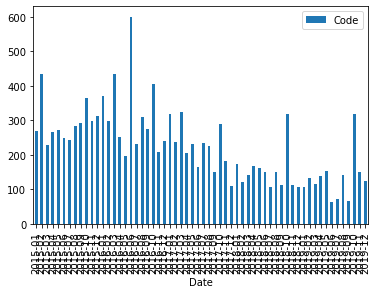

In [48]:
grouped_Year_Month = pandas.read_csv('RQ2test_data.csv')
grouped_Year_Month.plot(x="Date", y="Code", kind="bar")

Descriptive Statistics for Code and Non-code contributions per each year

In [7]:
#Stats for 2015
freq = pandas.read_csv('2015.csv')
print("2015 Descriptive statistics for Code contributions")
print("Mean: ", freq["Code"].mean())
print("Median: ",freq["Code"].median())
print("Mode: ",freq["Code"].mode())
print("Standard Deviation: ", freq["Code"].std())
print("Variance of code contributions: ", freq["Code"].var())

print("2015 Descriptive statistics for Non-code contributions")
print("Mean: ", freq["Non-Code"].mean())
print("Median: ",freq["Non-Code"].median())
print("Mode: ",freq["Non-Code"].mode())
print("Standard Deviation: ", freq["Non-Code"].std())
print("Variance of code contributions: ", freq["Non-Code"].var())

2015 Descriptive statistics for Code contributions
Mean:  292.5
Median:  279.0
Mode:  0     228
1     243
2     248
3     265
4     268
5     273
6     285
7     292
8     297
9     312
10    366
11    433
dtype: int64
Standard Deviation:  57.149723613425365
Variance of code contributions:  3266.090909090909
2015 Descriptive statistics for Non-code contributions
Mean:  1350.75
Median:  1387.5
Mode:  0      878
1      911
2     1150
3     1219
4     1351
5     1365
6     1410
7     1444
8     1447
9     1509
10    1703
11    1822
dtype: int64
Standard Deviation:  280.81120315646564
Variance of code contributions:  78854.93181818182


In [8]:
#Stats for 2016
freq = pandas.read_csv('2016.csv')
print("2016 Descriptive statistics for Code contributions")
print("Mean: ", freq["Code"].mean())
print("Median: ",freq["Code"].median())
print("Mode: ",freq["Code"].mode())
print("Standard Deviation: ", freq["Code"].std())
print("Variance of code contributions: ", freq["Code"].var())

print("2016 Descriptive statistics for Non-code contributions")
print("Mean: ", freq["Non-Code"].mean())
print("Median: ",freq["Non-Code"].median())
print("Mode: ",freq["Non-Code"].mode())
print("Standard Deviation: ", freq["Non-Code"].std())
print("Variance of code contributions: ", freq["Non-Code"].var())

2016 Descriptive statistics for Code contributions
Mean:  318.5
Median:  287.0
Mode:  0     196
1     207
2     233
3     240
4     251
5     276
6     298
7     310
8     372
9     405
10    434
11    600
dtype: int64
Standard Deviation:  117.04428066489893
Variance of code contributions:  13699.363636363636
2016 Descriptive statistics for Non-code contributions
Mean:  1237.5
Median:  1190.5
Mode:  0      990
1     1035
2     1043
3     1143
4     1146
5     1189
6     1192
7     1213
8     1373
9     1473
10    1510
11    1543
dtype: int64
Standard Deviation:  191.60209716066169
Variance of code contributions:  36711.36363636364


In [9]:
#Stats for 2017
freq = pandas.read_csv('2017.csv')
print("2017 Descriptive statistics for Code contributions")
print("Mean: ", freq["Code"].mean())
print("Median: ",freq["Code"].median())
print("Mode: ",freq["Code"].mode())
print("Standard Deviation: ", freq["Code"].std())
print("Variance of code contributions: ", freq["Code"].var())

print("2017 Descriptive statistics for Non-code contributions")
print("Mean: ", freq["Non-Code"].mean())
print("Median: ",freq["Non-Code"].median())
print("Mode: ",freq["Non-Code"].mode())
print("Standard Deviation: ", freq["Non-Code"].std())
print("Variance of code contributions: ", freq["Non-Code"].var())

2017 Descriptive statistics for Code contributions
Mean:  222.83333333333334
Median:  229.0
Mode:  0     109
1     150
2     165
3     183
4     206
5     225
6     233
7     234
8     238
9     289
10    319
11    323
dtype: int64
Standard Deviation:  65.78177881634416
Variance of code contributions:  4327.242424242425
2017 Descriptive statistics for Non-code contributions
Mean:  1030.0
Median:  972.0
Mode:  0      703
1      886
2      906
3      909
4      911
5      961
6      983
7     1023
8     1091
9     1270
10    1353
11    1364
dtype: int64
Standard Deviation:  203.61907394133604
Variance of code contributions:  41460.72727272727


In [10]:
#Stats for 2018
freq = pandas.read_csv('2018.csv')
print("2018 Descriptive statistics for Code contributions")
print("Mean: ", freq["Code"].mean())
print("Median: ",freq["Code"].median())
print("Mode: ",freq["Code"].mode())
print("Standard Deviation: ", freq["Code"].std())
print("Variance of code contributions: ", freq["Code"].var())

print("2018 Descriptive statistics for Non-code contributions")
print("Mean: ", freq["Non-Code"].mean())
print("Median: ",freq["Non-Code"].median())
print("Mode: ",freq["Non-Code"].mode())
print("Standard Deviation: ", freq["Non-Code"].std())
print("Variance of code contributions: ", freq["Non-Code"].var())

2018 Descriptive statistics for Code contributions
Mean:  152.41666666666666
Median:  146.5
Mode:  0    107
dtype: int64
Standard Deviation:  57.53174354346925
Variance of code contributions:  3309.901515151515
2018 Descriptive statistics for Non-code contributions
Mean:  1034.5
Median:  1002.5
Mode:  0      540
1      876
2      884
3      901
4      907
5      984
6     1021
7     1051
8     1086
9     1195
10    1334
11    1635
dtype: int64
Standard Deviation:  271.0415935876733
Variance of code contributions:  73463.54545454546


In [11]:
#Stats for 2019
freq = pandas.read_csv('2019.csv')
print("2019 Descriptive statistics for Code contributions")
print("Mean: ", freq["Code"].mean())
print("Median: ",freq["Code"].median())
print("Mode: ",freq["Code"].mode())
print("Standard Deviation: ", freq["Code"].std())
print("Variance of code contributions: ", freq["Code"].var())

print("2019 Descriptive statistics for Non-code contributions")
print("Mean: ", freq["Non-Code"].mean())
print("Median: ",freq["Non-Code"].median())
print("Mode: ",freq["Non-Code"].mode())
print("Standard Deviation: ", freq["Non-Code"].std())
print("Variance of code contributions: ", freq["Non-Code"].var())

2019 Descriptive statistics for Code contributions
Mean:  132.08333333333334
Median:  129.0
Mode:  0      64
1      67
2      71
3     106
4     116
5     125
6     133
7     140
8     141
9     150
10    154
11    318
dtype: int64
Standard Deviation:  66.81107465809615
Variance of code contributions:  4463.719696969697
2019 Descriptive statistics for Non-code contributions
Mean:  925.8333333333334
Median:  908.5
Mode:  0    689
dtype: int64
Standard Deviation:  272.06744930200114
Variance of code contributions:  74020.69696969696
